### International Gang

Members:   

          Aram Shojaei

          Ahmed Shahhat
          
          Nguyen Xuan Tung
          
          Pu Yin
    

### Third set of exercise CNN

### Package

In [1]:
import random
import seaborn
import keras
import csv
from math import log, sin, pi
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import initializers, regularizers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.regularizers import l1_l2
from keras.regularizers import l2

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
random.seed(12345)

step = lambda DX, bias: round(((log(random.random()))*DX)*2*(random.randint(0,1)-0.5) + bias)

for i in range(10):
    print(step(50,5))
    
def pattern(y,z,a,i):  
    """......"""
    return round((3-2*y)*a*sin((pi*i/z)))

49
-5
13
-60
96
-2
34
30
57
-27


[0, 49, 44, 57, -3, 93, 91, 125, 155, 212, 185, 217, 317, 239, 187, 138, 426, 444, 387, 504, 524, 527, 543, 442, 524, 461, 499, 663, 728, 828, 780, 692, 915, 937, 989, 982, 1064, 1106, 897, 846, 855, 910, 944, 914, 992, 1088, 1124, 1033, 1044, 982, 851, 900, 909, 734, 826, 917, 920, 981, 1008, 1036] 0
[1036, 1055, 1005, 1114, 1052, 1213, 1241, 1339, 1279, 1265, 1211, 1158, 1255, 1421, 1583, 1687, 1916, 1931, 1834, 1711, 1621, 1393, 1327, 1246, 1126, 1058, 1143, 1257, 1250, 1302, 1236, 1336, 1273, 1186, 1354, 1477, 1452, 1458, 1476, 1454, 1486, 1452, 1642, 1640, 1665, 1613, 1464, 1422, 1531, 1508, 1515, 1544, 1546, 1560, 1526, 1673, 1673, 1693, 1746, 1751] 1
[1751, 1761, 1674, 1687, 1713, 1730, 1764, 1887, 1815, 1745, 1735, 1761, 1787, 1759, 1692, 1678, 1645, 1581, 1629, 1546, 1618, 1600, 1418, 1428, 1421, 1247, 1202, 1280, 1354, 1564, 1625, 1621, 1531, 1337, 1234, 1148, 1075, 1097, 1098, 1157, 1246, 1373, 1433, 1561, 1529, 1553, 1573, 1578, 1597, 1579, 1492, 1492, 1405, 1387, 1350, 128

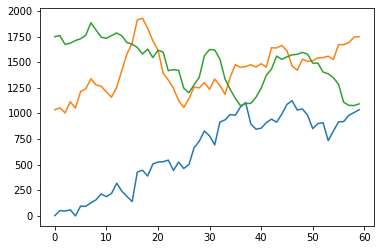

In [3]:
random.seed(12345)
#pattern feature
Z = 12
A = 500
#data
N=10000
L=60

DX = 50
bias = 5

y = [0]*N
x = [[0]*L for i in range(N)]

for n in range(N):
    if n > 0:
        x[n][0] = x[n-1][-1]
    for j in range(1,L):
        x[n][j] = x[n][j-1]+step(DX,bias)  
        
    y[n] = n%3
    if y[n]>0:
        j0 = random.randint(0,L-1-Z)
        for j in range(Z):
            x[n][j0+j] += pattern(y[n],Z,A,j)
for n in range(3):
    print(x[n], y[n])

plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

In [44]:
!mkdir DATA
import csv
str0 = f"ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}"
print(str0)
fname = "DATA/x_"+str0+".csv"

with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    for n in range(N):
        writer.writerow(x[n])

fname = "DATA/y_"+str0+".csv"
with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    writer.writerows(map(lambda yy:[yy],y))

ts_L60_Z12_A500_DX50_bias5_N10000


A subdirectory or file DATA already exists.


10000


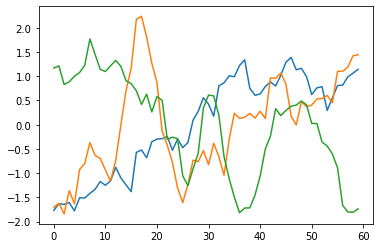

[1. 0. 0.]
10000 8000 2000 60


In [45]:
str0 = "ts_L60_Z12_A500_DX50_bias5_N10000"
fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x= np.loadtxt(fnamex, delimiter=",",dtype=float)
N = len(x)
print(N)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n]

std = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / std[n]
    
    
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ= np.loadtxt(fnamey, delimiter=",",dtype=int)
N_categ = 3
y = np.zeros((N,N_categ))
for n in range (N):
    y[n][categ[n]] = 1
print(y[0])

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N-N_train

x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N,N_train,N_val,L)



### DATA reshaping

In [46]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

### Convolutional NN

In [47]:
reg = regularizers.l1(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters=5, kernel_size=7, activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="softmax"))

print(model.summary())

opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_6 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten_6 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                

In [48]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
32/32 - 1s - loss: 1.0996 - accuracy: 0.3613 - val_loss: 1.0968 - val_accuracy: 0.3885
Epoch 2/250
32/32 - 0s - loss: 1.0938 - accuracy: 0.3870 - val_loss: 1.0883 - val_accuracy: 0.4140
Epoch 3/250
32/32 - 0s - loss: 1.0827 - accuracy: 0.4169 - val_loss: 1.0714 - val_accuracy: 0.4530
Epoch 4/250
32/32 - 0s - loss: 1.0675 - accuracy: 0.4261 - val_loss: 1.0495 - val_accuracy: 0.4690
Epoch 5/250
32/32 - 0s - loss: 1.0468 - accuracy: 0.4519 - val_loss: 1.0294 - val_accuracy: 0.4825
Epoch 6/250
32/32 - 0s - loss: 1.0277 - accuracy: 0.4663 - val_loss: 1.0105 - val_accuracy: 0.4985
Epoch 7/250
32/32 - 0s - loss: 1.0085 - accuracy: 0.4825 - val_loss: 0.9903 - val_accuracy: 0.5140
Epoch 8/250
32/32 - 0s - loss: 0.9870 - accuracy: 0.5052 - val_loss: 0.9695 - val_accuracy: 0.5360
Epoch 9/250
32/32 - 0s - loss: 0.9646 - accuracy: 0.5192 - val_loss: 0.9436 - val_accuracy: 0.5645
Epoch 10/250
32/32 - 0s - loss: 0.9352 - accuracy: 0.5472 - val_loss: 0.9079 - val_accuracy: 0.5910
Epoch 11/

Epoch 84/250
32/32 - 0s - loss: 0.6470 - accuracy: 0.7430 - val_loss: 0.6236 - val_accuracy: 0.7485
Epoch 85/250
32/32 - 0s - loss: 0.6392 - accuracy: 0.7390 - val_loss: 0.6247 - val_accuracy: 0.7440
Epoch 86/250
32/32 - 0s - loss: 0.6408 - accuracy: 0.7420 - val_loss: 0.6189 - val_accuracy: 0.7530
Epoch 87/250
32/32 - 0s - loss: 0.6372 - accuracy: 0.7405 - val_loss: 0.6187 - val_accuracy: 0.7515
Epoch 88/250
32/32 - 0s - loss: 0.6425 - accuracy: 0.7409 - val_loss: 0.6213 - val_accuracy: 0.7465
Epoch 89/250
32/32 - 0s - loss: 0.6371 - accuracy: 0.7429 - val_loss: 0.6167 - val_accuracy: 0.7535
Epoch 90/250
32/32 - 0s - loss: 0.6327 - accuracy: 0.7448 - val_loss: 0.6149 - val_accuracy: 0.7525
Epoch 91/250
32/32 - 0s - loss: 0.6342 - accuracy: 0.7464 - val_loss: 0.6155 - val_accuracy: 0.7525
Epoch 92/250
32/32 - 0s - loss: 0.6326 - accuracy: 0.7475 - val_loss: 0.6146 - val_accuracy: 0.7550
Epoch 93/250
32/32 - 0s - loss: 0.6297 - accuracy: 0.7464 - val_loss: 0.6123 - val_accuracy: 0.7545


Epoch 166/250
32/32 - 0s - loss: 0.5820 - accuracy: 0.7726 - val_loss: 0.5785 - val_accuracy: 0.7615
Epoch 167/250
32/32 - 0s - loss: 0.5855 - accuracy: 0.7725 - val_loss: 0.5780 - val_accuracy: 0.7625
Epoch 168/250
32/32 - 0s - loss: 0.5801 - accuracy: 0.7724 - val_loss: 0.5787 - val_accuracy: 0.7645
Epoch 169/250
32/32 - 0s - loss: 0.5795 - accuracy: 0.7713 - val_loss: 0.5793 - val_accuracy: 0.7650
Epoch 170/250
32/32 - 0s - loss: 0.5837 - accuracy: 0.7676 - val_loss: 0.5766 - val_accuracy: 0.7670
Epoch 171/250
32/32 - 0s - loss: 0.5789 - accuracy: 0.7753 - val_loss: 0.5806 - val_accuracy: 0.7635
Epoch 172/250
32/32 - 0s - loss: 0.5843 - accuracy: 0.7729 - val_loss: 0.5753 - val_accuracy: 0.7635
Epoch 173/250
32/32 - 0s - loss: 0.5731 - accuracy: 0.7754 - val_loss: 0.5780 - val_accuracy: 0.7680
Epoch 174/250
32/32 - 0s - loss: 0.5807 - accuracy: 0.7742 - val_loss: 0.5766 - val_accuracy: 0.7650
Epoch 175/250
32/32 - 0s - loss: 0.5784 - accuracy: 0.7751 - val_loss: 0.5741 - val_accurac

32/32 - 0s - loss: 0.5509 - accuracy: 0.7869 - val_loss: 0.5605 - val_accuracy: 0.7770
Epoch 248/250
32/32 - 0s - loss: 0.5443 - accuracy: 0.7920 - val_loss: 0.5532 - val_accuracy: 0.7815
Epoch 249/250
32/32 - 0s - loss: 0.5453 - accuracy: 0.7933 - val_loss: 0.5555 - val_accuracy: 0.7805
Epoch 250/250
32/32 - 0s - loss: 0.5512 - accuracy: 0.7887 - val_loss: 0.5548 - val_accuracy: 0.7840


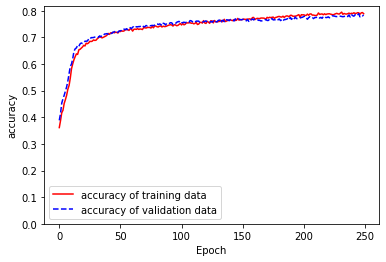

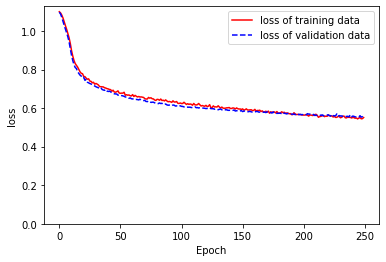

In [49]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    
    plt.savefig("accuracy vs validation1_1.jpg")
    plt.savefig("accuracy vs validation1_2.jpg")
    plt.show()

### -----------------------------------------------------------------------------------------------------------------------------

### Create the confusion matrix for the model

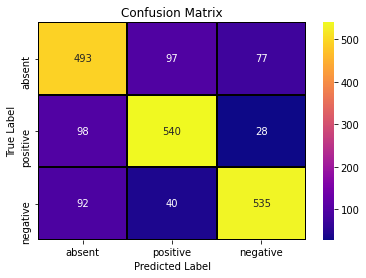

In [51]:
LABELS = ["absent", "positive", "negative"]

def confusion_matrix(validations, predictions):
    
    matrix = metrics.confusion_matrix(validations, predictions)
    sn.heatmap(matrix, xticklabels=LABELS,
              yticklabels=LABELS, annot=True,
              fmt='d',linecolor='black',linewidth=1,
              cmap='plasma')
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig("Confusion matrix1.jpg")
    plt.show()
    plt.close()

y_pred_val = model.predict(x_val)
max_y_pred_val = np.argmax(y_pred_val,axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_matrix(max_y_val, max_y_pred_val)

In [52]:
print(y_pred_val)
print(max_y_pred_val)
print(max_y_val)

[[0.02288902 0.01337616 0.9637348 ]
 [0.02698525 0.00101773 0.97199696]
 [0.02025842 0.97786796 0.00187362]
 ...
 [0.02365904 0.97505707 0.0012839 ]
 [0.3371117  0.39887252 0.26401573]
 [0.6601631  0.25226218 0.08757475]]
[2 2 1 ... 1 1 0]
[2 0 1 ... 1 2 0]


### -----------------------------------------------------------------------------------------------------------------------------

### Reduce the the signal-to-noise ratio

We test multiple value of amplitude A form 100 to 450. In the notebook, we choose the final value of A = 200 to see the performance of the network. 

In [53]:
Z = 12
A2 = 200
#data
N=10000
L=60

DX = 50
bias = 5

y = [0]*N
x = [[0]*L for i in range(N)]

for n in range(N):
    if n > 0:
        x[n][0] = x[n-1][-1]
    for j in range(1,L):
        x[n][j] = x[n][j-1]+step(DX,bias)  
        
    y[n] = n%3
    if y[n]>0:
        j0 = random.randint(0,L-1-Z)
        for j in range(Z):
            x[n][j0+j] += pattern(y[n],Z,A2,j)   

In [54]:
!mkdir DATA
import csv
str0 = f"ts_L{L}_Z{Z}_A{A2}_DX{DX}_bias{bias}_N{N}"
print(str0)
fname = "DATA/x_"+str0+".csv"

with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    for n in range(N):
        writer.writerow(x[n])

fname = "DATA/y_"+str0+".csv"
with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    writer.writerows(map(lambda yy:[yy],y))

A subdirectory or file DATA already exists.


ts_L60_Z12_A200_DX50_bias5_N10000


In [55]:
str0 = "ts_L60_Z12_A200_DX50_bias5_N10000"
fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

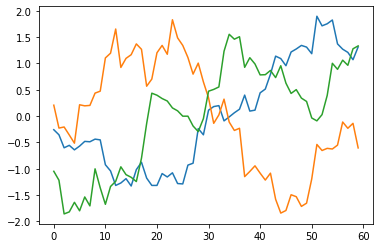

[1. 0. 0.]


In [56]:
x= np.loadtxt(fnamex, delimiter=",",dtype=float)
N = len(x)
xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n]

std = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / std[n]
    
    
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ= np.loadtxt(fnamey, delimiter=",",dtype=int)
N_categ = 3
y = np.zeros((N,N_categ))
for n in range (N):
    y[n][categ[n]] = 1
print(y[0])

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N-N_train

x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])


In [57]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

In [58]:
reg = regularizers.l1(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters=5, kernel_size=7, activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation="softmax"))

print(model.summary())

opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_7 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 4, 5)              180       
_________________________________________________________________
flatten_7 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                

In [59]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
32/32 - 1s - loss: 1.1013 - accuracy: 0.3425 - val_loss: 1.1011 - val_accuracy: 0.3280
Epoch 2/250
32/32 - 0s - loss: 1.0997 - accuracy: 0.3478 - val_loss: 1.1004 - val_accuracy: 0.3265
Epoch 3/250
32/32 - 0s - loss: 1.0997 - accuracy: 0.3449 - val_loss: 1.0998 - val_accuracy: 0.3380
Epoch 4/250
32/32 - 0s - loss: 1.0990 - accuracy: 0.3466 - val_loss: 1.0993 - val_accuracy: 0.3340
Epoch 5/250
32/32 - 0s - loss: 1.0987 - accuracy: 0.3531 - val_loss: 1.0991 - val_accuracy: 0.3430
Epoch 6/250
32/32 - 0s - loss: 1.0975 - accuracy: 0.3543 - val_loss: 1.0984 - val_accuracy: 0.3390
Epoch 7/250
32/32 - 0s - loss: 1.0986 - accuracy: 0.3550 - val_loss: 1.0990 - val_accuracy: 0.3480
Epoch 8/250
32/32 - 0s - loss: 1.0969 - accuracy: 0.3661 - val_loss: 1.0980 - val_accuracy: 0.3450
Epoch 9/250
32/32 - 0s - loss: 1.0960 - accuracy: 0.3649 - val_loss: 1.0979 - val_accuracy: 0.3490
Epoch 10/250
32/32 - 0s - loss: 1.0948 - accuracy: 0.3641 - val_loss: 1.0965 - val_accuracy: 0.3480
Epoch 11/

Epoch 84/250
32/32 - 0s - loss: 1.0717 - accuracy: 0.4184 - val_loss: 1.0737 - val_accuracy: 0.4150
Epoch 85/250
32/32 - 0s - loss: 1.0712 - accuracy: 0.4201 - val_loss: 1.0735 - val_accuracy: 0.4105
Epoch 86/250
32/32 - 0s - loss: 1.0712 - accuracy: 0.4199 - val_loss: 1.0738 - val_accuracy: 0.4170
Epoch 87/250
32/32 - 0s - loss: 1.0714 - accuracy: 0.4194 - val_loss: 1.0742 - val_accuracy: 0.4150
Epoch 88/250
32/32 - 0s - loss: 1.0725 - accuracy: 0.4155 - val_loss: 1.0738 - val_accuracy: 0.4115
Epoch 89/250
32/32 - 0s - loss: 1.0702 - accuracy: 0.4173 - val_loss: 1.0739 - val_accuracy: 0.4085
Epoch 90/250
32/32 - 0s - loss: 1.0705 - accuracy: 0.4144 - val_loss: 1.0730 - val_accuracy: 0.4080
Epoch 91/250
32/32 - 0s - loss: 1.0718 - accuracy: 0.4146 - val_loss: 1.0733 - val_accuracy: 0.4175
Epoch 92/250
32/32 - 0s - loss: 1.0703 - accuracy: 0.4254 - val_loss: 1.0731 - val_accuracy: 0.4120
Epoch 93/250
32/32 - 0s - loss: 1.0705 - accuracy: 0.4218 - val_loss: 1.0724 - val_accuracy: 0.4145


Epoch 166/250
32/32 - 0s - loss: 1.0620 - accuracy: 0.4372 - val_loss: 1.0739 - val_accuracy: 0.4160
Epoch 167/250
32/32 - 0s - loss: 1.0625 - accuracy: 0.4356 - val_loss: 1.0742 - val_accuracy: 0.4140
Epoch 168/250
32/32 - 0s - loss: 1.0616 - accuracy: 0.4387 - val_loss: 1.0731 - val_accuracy: 0.4075
Epoch 169/250
32/32 - 0s - loss: 1.0631 - accuracy: 0.4313 - val_loss: 1.0724 - val_accuracy: 0.4130
Epoch 170/250
32/32 - 0s - loss: 1.0621 - accuracy: 0.4364 - val_loss: 1.0736 - val_accuracy: 0.4135
Epoch 171/250
32/32 - 0s - loss: 1.0627 - accuracy: 0.4386 - val_loss: 1.0722 - val_accuracy: 0.4090
Epoch 172/250
32/32 - 0s - loss: 1.0620 - accuracy: 0.4378 - val_loss: 1.0735 - val_accuracy: 0.4095
Epoch 173/250
32/32 - 0s - loss: 1.0636 - accuracy: 0.4339 - val_loss: 1.0727 - val_accuracy: 0.4130
Epoch 174/250
32/32 - 0s - loss: 1.0608 - accuracy: 0.4379 - val_loss: 1.0725 - val_accuracy: 0.4120
Epoch 175/250
32/32 - 0s - loss: 1.0624 - accuracy: 0.4310 - val_loss: 1.0730 - val_accurac

Epoch 248/250
32/32 - 0s - loss: 1.0547 - accuracy: 0.4498 - val_loss: 1.0732 - val_accuracy: 0.4185
Epoch 249/250
32/32 - 0s - loss: 1.0574 - accuracy: 0.4399 - val_loss: 1.0740 - val_accuracy: 0.4210
Epoch 250/250
32/32 - 0s - loss: 1.0562 - accuracy: 0.4453 - val_loss: 1.0733 - val_accuracy: 0.4185


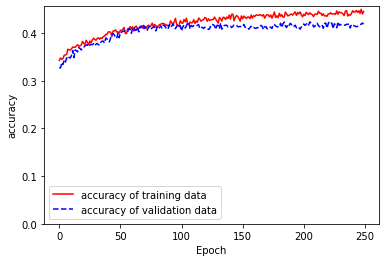

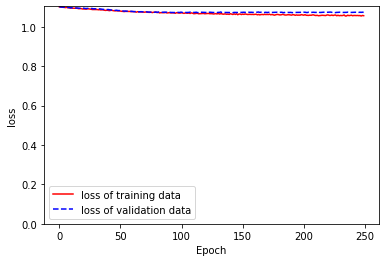

In [60]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.savefig("accuracy vs validation2.jpg")
    plt.show()
    plt.close()

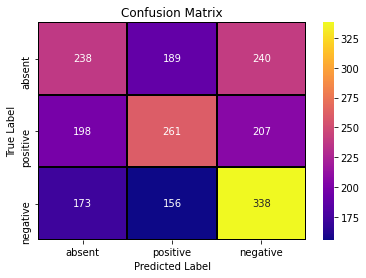

In [61]:
LABELS = ["absent", "positive", "negative"]

def confusion_matrix(validations, predictions):
    
    matrix = metrics.confusion_matrix(validations, predictions)
    sn.heatmap(matrix, xticklabels=LABELS,
              yticklabels=LABELS, annot=True,
              fmt='d',linecolor='black',linewidth=1,
              cmap='plasma')
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig("Confusion matrix reduce.jpg")
    plt.show()
    plt.close()

y_pred_val = model.predict(x_val)
max_y_pred_val = np.argmax(y_pred_val,axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_matrix(max_y_val, max_y_pred_val)

By decreasing amplitude of the external signal in the data (A) with
respect to the step typical size DX of the jump process, we can see that the network is going wrost and wrost. When reducing A less than 100, the network is totally random. 

### -----------------------------------------------------------------------------------------------------------------------------

### Convolutional NN with new dataset

In this section, we tried another data x_ts_comp_N10000.csv, y_ts_comp_N10000.csv.

Because the value of A make the performance of network bad so we keep it as 500. 

In [62]:
random.seed(12345)
#pattern feature
Z = 12
A = 500
#data
N=10000
L=60

DX = 50
bias = 5

y = [0]*N
x = [[0]*L for i in range(N)]

for n in range(N):
    if n > 0:
        x[n][0] = x[n-1][-1]
    for j in range(1,L):
        x[n][j] = x[n][j-1]+step(DX,bias)  
        
    y[n] = n%3
    if y[n]>0:
        j0 = random.randint(0,L-1-Z)
        for j in range(Z):
            x[n][j0+j] += pattern(y[n],Z,A,j)

10000


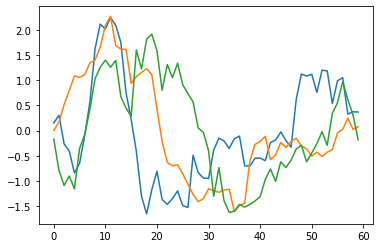

[0. 1. 0.]
10000 7000 3000 60


In [63]:
str1 = "ts_comp_N10000"
fnamex = "DATA1/x_"+str1+".csv"
fnamey = "DATA1/y_"+str1+".csv"

x= np.loadtxt(fnamex, delimiter=",",dtype=float)
N = len(x)
print(N)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n]

std = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / std[n]
    
    
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ= np.loadtxt(fnamey, delimiter=",",dtype=int)
N_categ = 3
y = np.zeros((N,N_categ))
for n in range (N):
    y[n][categ[n]] = 1
print(y[0])

perc_train = 0.7
N_train = int(N*perc_train)
N_val = N-N_train

x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N,N_train,N_val,L)

In [64]:
x_train = x_train.reshape(x_train.shape[0],L,1)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

We created another version of the CNN above by using only one convolution layer and five dense layers with maximum of 600 trainable parameters. 

In [65]:
reg = regularizers.l1(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="relu"))
model.add(Dense(5,activation="sigmoid"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(N_categ, activation="softmax"))


print(model.summary())

opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_8 (Average (None, 10, 5)             0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 408       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_30 (Dense)             (None, 5)                

In [66]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
28/28 - 1s - loss: 1.1686 - accuracy: 0.3334 - val_loss: 1.1448 - val_accuracy: 0.3167
Epoch 2/250
28/28 - 0s - loss: 1.1235 - accuracy: 0.3334 - val_loss: 1.1127 - val_accuracy: 0.3167
Epoch 3/250
28/28 - 0s - loss: 1.1044 - accuracy: 0.3334 - val_loss: 1.1020 - val_accuracy: 0.3167
Epoch 4/250
28/28 - 0s - loss: 1.0993 - accuracy: 0.3324 - val_loss: 1.0993 - val_accuracy: 0.3170
Epoch 5/250
28/28 - 0s - loss: 1.0984 - accuracy: 0.3366 - val_loss: 1.0984 - val_accuracy: 0.3430
Epoch 6/250
28/28 - 0s - loss: 1.0978 - accuracy: 0.3549 - val_loss: 1.0973 - val_accuracy: 0.3783
Epoch 7/250
28/28 - 0s - loss: 1.0968 - accuracy: 0.3707 - val_loss: 1.0957 - val_accuracy: 0.4000
Epoch 8/250
28/28 - 0s - loss: 1.0945 - accuracy: 0.3886 - val_loss: 1.0927 - val_accuracy: 0.4100
Epoch 9/250
28/28 - 0s - loss: 1.0910 - accuracy: 0.4023 - val_loss: 1.0875 - val_accuracy: 0.4293
Epoch 10/250
28/28 - 0s - loss: 1.0843 - accuracy: 0.4104 - val_loss: 1.0798 - val_accuracy: 0.4297
Epoch 11/

28/28 - 0s - loss: 0.6879 - accuracy: 0.6833 - val_loss: 0.6598 - val_accuracy: 0.7037
Epoch 84/250
28/28 - 0s - loss: 0.6859 - accuracy: 0.6811 - val_loss: 0.6576 - val_accuracy: 0.7037
Epoch 85/250
28/28 - 0s - loss: 0.6857 - accuracy: 0.6799 - val_loss: 0.6572 - val_accuracy: 0.7040
Epoch 86/250
28/28 - 0s - loss: 0.6837 - accuracy: 0.6823 - val_loss: 0.6568 - val_accuracy: 0.7053
Epoch 87/250
28/28 - 0s - loss: 0.6789 - accuracy: 0.6859 - val_loss: 0.6649 - val_accuracy: 0.6990
Epoch 88/250
28/28 - 0s - loss: 0.6790 - accuracy: 0.6869 - val_loss: 0.6620 - val_accuracy: 0.7013
Epoch 89/250
28/28 - 0s - loss: 0.6702 - accuracy: 0.6924 - val_loss: 0.6555 - val_accuracy: 0.7067
Epoch 90/250
28/28 - 0s - loss: 0.6709 - accuracy: 0.6894 - val_loss: 0.6642 - val_accuracy: 0.7067
Epoch 91/250
28/28 - 0s - loss: 0.6794 - accuracy: 0.6877 - val_loss: 0.6532 - val_accuracy: 0.7113
Epoch 92/250
28/28 - 0s - loss: 0.6683 - accuracy: 0.6953 - val_loss: 0.6485 - val_accuracy: 0.7090
Epoch 93/250


Epoch 165/250
28/28 - 0s - loss: 0.6270 - accuracy: 0.7227 - val_loss: 0.6319 - val_accuracy: 0.7327
Epoch 166/250
28/28 - 0s - loss: 0.6226 - accuracy: 0.7284 - val_loss: 0.6231 - val_accuracy: 0.7393
Epoch 167/250
28/28 - 0s - loss: 0.6155 - accuracy: 0.7353 - val_loss: 0.6274 - val_accuracy: 0.7357
Epoch 168/250
28/28 - 0s - loss: 0.6167 - accuracy: 0.7286 - val_loss: 0.6269 - val_accuracy: 0.7343
Epoch 169/250
28/28 - 0s - loss: 0.6236 - accuracy: 0.7280 - val_loss: 0.6218 - val_accuracy: 0.7367
Epoch 170/250
28/28 - 0s - loss: 0.6202 - accuracy: 0.7256 - val_loss: 0.6212 - val_accuracy: 0.7347
Epoch 171/250
28/28 - 0s - loss: 0.6215 - accuracy: 0.7256 - val_loss: 0.6330 - val_accuracy: 0.7350
Epoch 172/250
28/28 - 0s - loss: 0.6200 - accuracy: 0.7307 - val_loss: 0.6216 - val_accuracy: 0.7357
Epoch 173/250
28/28 - 0s - loss: 0.6190 - accuracy: 0.7294 - val_loss: 0.6207 - val_accuracy: 0.7390
Epoch 174/250
28/28 - 0s - loss: 0.6174 - accuracy: 0.7319 - val_loss: 0.6347 - val_accurac

28/28 - 0s - loss: 0.5981 - accuracy: 0.7423 - val_loss: 0.6254 - val_accuracy: 0.7347
Epoch 247/250
28/28 - 0s - loss: 0.5980 - accuracy: 0.7476 - val_loss: 0.6207 - val_accuracy: 0.7317
Epoch 248/250
28/28 - 0s - loss: 0.5949 - accuracy: 0.7456 - val_loss: 0.6215 - val_accuracy: 0.7363
Epoch 249/250
28/28 - 0s - loss: 0.5928 - accuracy: 0.7486 - val_loss: 0.6139 - val_accuracy: 0.7480
Epoch 250/250
28/28 - 0s - loss: 0.5967 - accuracy: 0.7420 - val_loss: 0.6082 - val_accuracy: 0.7450


By adding more Dense layers with maximum 600 trainable parameters, we can see that the model runs slightly quicker than the old model. 

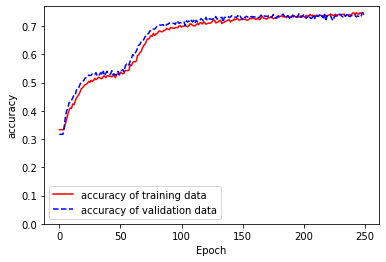

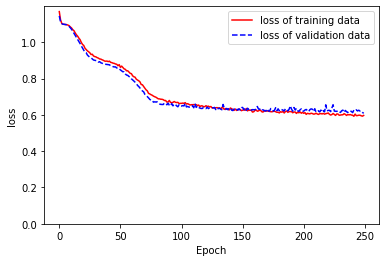

In [67]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.savefig("accuracy vs validation 3.jpg")
    plt.show()
    plt.close()

    

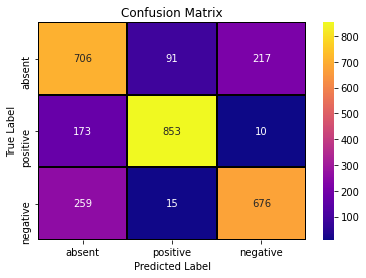

In [68]:
LABELS = ["absent", "positive", "negative"]

def confusion_matrix(validations, predictions):
    
    matrix = metrics.confusion_matrix(validations, predictions)
    sn.heatmap(matrix, xticklabels=LABELS,
              yticklabels=LABELS, annot=True,
              fmt='d',linecolor='black',linewidth=1,
              cmap='plasma')
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig("Confusion matrix1.jpg")
    plt.show()
    plt.close()

y_pred_val = model.predict(x_val)
max_y_pred_val = np.argmax(y_pred_val,axis=1)
max_y_val = np.argmax(y_val, axis=1)
confusion_matrix(max_y_val, max_y_pred_val)

### -----------------------------------------------------------------------------------------------------------------------------

### Regualrizations

L2 (Ridge) regression adds “squared magnitude” of coefficient as penalty term to the loss function.

L1 (Lasso Regression) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting.

In this section, we will try to improve the CNN with combination of L1 and L2 regualrizations. The regularation also acted on both kernel and bias. 

In [69]:
reg = regularizers.l1_l2(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="relu"))
model.add(Dense(5,activation="sigmoid"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(N_categ, activation="softmax"))


print(model.summary())

opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_9 (Average (None, 10, 5)             0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 408       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_35 (Dense)             (None, 5)                

In [70]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
28/28 - 1s - loss: 1.1221 - accuracy: 0.3370 - val_loss: 1.1155 - val_accuracy: 0.3380
Epoch 2/250
28/28 - 0s - loss: 1.1070 - accuracy: 0.3370 - val_loss: 1.1048 - val_accuracy: 0.3380
Epoch 3/250
28/28 - 0s - loss: 1.1009 - accuracy: 0.3369 - val_loss: 1.1006 - val_accuracy: 0.3400
Epoch 4/250
28/28 - 0s - loss: 1.0989 - accuracy: 0.3359 - val_loss: 1.0984 - val_accuracy: 0.3427
Epoch 5/250
28/28 - 0s - loss: 1.0973 - accuracy: 0.3514 - val_loss: 1.0956 - val_accuracy: 0.3853
Epoch 6/250
28/28 - 0s - loss: 1.0942 - accuracy: 0.3841 - val_loss: 1.0918 - val_accuracy: 0.4080
Epoch 7/250
28/28 - 0s - loss: 1.0899 - accuracy: 0.3970 - val_loss: 1.0860 - val_accuracy: 0.4240
Epoch 8/250
28/28 - 0s - loss: 1.0819 - accuracy: 0.4214 - val_loss: 1.0776 - val_accuracy: 0.4223
Epoch 9/250
28/28 - 0s - loss: 1.0746 - accuracy: 0.4177 - val_loss: 1.0673 - val_accuracy: 0.4387
Epoch 10/250
28/28 - 0s - loss: 1.0630 - accuracy: 0.4444 - val_loss: 1.0551 - val_accuracy: 0.4560
Epoch 11/

Epoch 84/250
28/28 - 0s - loss: 0.7696 - accuracy: 0.5883 - val_loss: 0.7540 - val_accuracy: 0.6073
Epoch 85/250
28/28 - 0s - loss: 0.7651 - accuracy: 0.5941 - val_loss: 0.7501 - val_accuracy: 0.6040
Epoch 86/250
28/28 - 0s - loss: 0.7675 - accuracy: 0.5899 - val_loss: 0.7473 - val_accuracy: 0.6130
Epoch 87/250
28/28 - 0s - loss: 0.7592 - accuracy: 0.5983 - val_loss: 0.7471 - val_accuracy: 0.6073
Epoch 88/250
28/28 - 0s - loss: 0.7565 - accuracy: 0.6016 - val_loss: 0.7425 - val_accuracy: 0.6187
Epoch 89/250
28/28 - 0s - loss: 0.7561 - accuracy: 0.6024 - val_loss: 0.7400 - val_accuracy: 0.6190
Epoch 90/250
28/28 - 0s - loss: 0.7543 - accuracy: 0.5979 - val_loss: 0.7377 - val_accuracy: 0.6203
Epoch 91/250
28/28 - 0s - loss: 0.7484 - accuracy: 0.6134 - val_loss: 0.7340 - val_accuracy: 0.6327
Epoch 92/250
28/28 - 0s - loss: 0.7457 - accuracy: 0.6036 - val_loss: 0.7285 - val_accuracy: 0.6327
Epoch 93/250
28/28 - 0s - loss: 0.7416 - accuracy: 0.6074 - val_loss: 0.7257 - val_accuracy: 0.6383


Epoch 166/250
28/28 - 0s - loss: 0.6310 - accuracy: 0.6983 - val_loss: 0.6142 - val_accuracy: 0.7390
Epoch 167/250
28/28 - 0s - loss: 0.6328 - accuracy: 0.7009 - val_loss: 0.6138 - val_accuracy: 0.7413
Epoch 168/250
28/28 - 0s - loss: 0.6289 - accuracy: 0.7039 - val_loss: 0.6136 - val_accuracy: 0.7430
Epoch 169/250
28/28 - 0s - loss: 0.6285 - accuracy: 0.7031 - val_loss: 0.6160 - val_accuracy: 0.7410
Epoch 170/250
28/28 - 0s - loss: 0.6362 - accuracy: 0.6983 - val_loss: 0.6123 - val_accuracy: 0.7427
Epoch 171/250
28/28 - 0s - loss: 0.6312 - accuracy: 0.7010 - val_loss: 0.6117 - val_accuracy: 0.7433
Epoch 172/250
28/28 - 0s - loss: 0.6246 - accuracy: 0.7056 - val_loss: 0.6144 - val_accuracy: 0.7407
Epoch 173/250
28/28 - 0s - loss: 0.6270 - accuracy: 0.7046 - val_loss: 0.6109 - val_accuracy: 0.7427
Epoch 174/250
28/28 - 0s - loss: 0.6212 - accuracy: 0.7133 - val_loss: 0.6113 - val_accuracy: 0.7407
Epoch 175/250
28/28 - 0s - loss: 0.6280 - accuracy: 0.7096 - val_loss: 0.6074 - val_accurac

28/28 - 0s - loss: 0.5987 - accuracy: 0.7247 - val_loss: 0.5951 - val_accuracy: 0.7567
Epoch 248/250
28/28 - 0s - loss: 0.6032 - accuracy: 0.7230 - val_loss: 0.5951 - val_accuracy: 0.7553
Epoch 249/250
28/28 - 0s - loss: 0.6071 - accuracy: 0.7193 - val_loss: 0.6094 - val_accuracy: 0.7550
Epoch 250/250
28/28 - 0s - loss: 0.6088 - accuracy: 0.7196 - val_loss: 0.5986 - val_accuracy: 0.7617


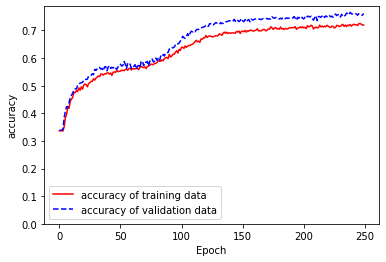

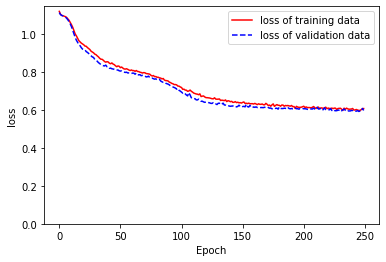

In [71]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.savefig("accuracy vs validation 4.jpg")
    plt.show()
    plt.close()

We made several test on different values of lambda, the value of lambda is 0.001 makes the performace of the network better. All the values which larger than it will overfit the network. 

Weights of the filter.

The weights are represented as the multiplicative factor of the filters.


w0T= [[[-4.31723939e-03 -1.28910905e-02  6.67684199e-03  1.47030011e-01
    1.03555851e-01 -1.75250590e-01 -1.02820389e-01  4.47804965e-02
   -6.75247908e-02  4.08921242e-02  2.74785962e-02]]

 [[ 1.92248020e-02 -3.00849788e-03 -6.86116368e-02 -7.99236968e-02
   -4.62130457e-02  8.85157147e-04  5.85186705e-02  5.09707741e-02
    2.82249507e-02  3.01701128e-02  4.30541858e-02]]

 [[ 3.62446271e-02  1.05347142e-01 -1.64364561e-01  3.19232903e-02
   -1.70527816e-01  2.27294534e-01 -1.60037592e-01  1.60798550e-01
   -1.21874481e-01  3.48083705e-01 -2.88499117e-01]]

 [[-1.98008537e-01  1.12904925e-02  7.93351457e-02  6.86377361e-02
    3.64638194e-02  4.74327207e-02  8.48605633e-02  8.58553275e-02
    6.24621883e-02 -1.76717434e-02 -2.14622706e-01]]

 [[ 1.10123383e-05  2.96771577e-06  5.99972191e-06  8.16506144e-06
    6.98688473e-06  1.57686063e-05 -2.39613219e-05 -1.16897554e-05
   -5.02960320e-05 -4.13289454e-05 -3.79978155e-05]]]
w01= [-0.02346236 -0.17119409 -0.08722387 -0.19910637 -

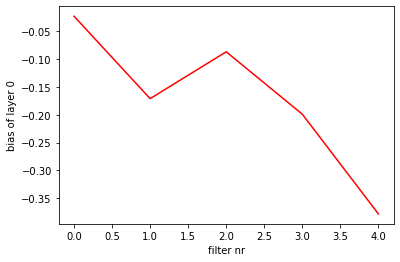

[-0.02346236 -0.17119409 -0.08722387 -0.19910637 -0.3779017 ]


In [72]:
c = ['k', 'r', 'y', 'b', 'm']
def plt_w(w):
    #Plot weight of convol. layer
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0],c[i],label=str(i))
    plt.ylabel('weight')
    plt.xlabel('index')
    plt.legend()
    plt.show()
    
w0 = model.layers[0].get_weights()[0]    
w01 = model.layers[0].get_weights()[1]   
w0T = w0.T
print('w0T=', w0T)
print('w01=', w01)
print(len(w0))
print(len(w0T))

plt.plot(w01, 'r', label=str(i))
plt.ylabel('bias of layer 0')
plt.xlabel('filter nr')
plt.show()
print(w01)

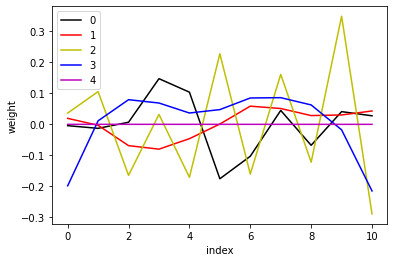

<Figure size 432x288 with 0 Axes>

In [73]:
plt_w(w0T)
plt.savefig("weights l1 l2.jpg")
plt.show()
plt.close()

In this section, we will try the CNN with the L2 (Ridge) regualrization. The regularation also acted on both kernel and bias.

In [74]:
reg = regularizers.l2(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="relu"))
model.add(Dense(5,activation="sigmoid"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(N_categ, activation="softmax"))


print(model.summary())

opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_10 (Averag (None, 10, 5)             0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 408       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_40 (Dense)             (None, 5)               

In [75]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
28/28 - 1s - loss: 1.0992 - accuracy: 0.3216 - val_loss: 1.0983 - val_accuracy: 0.3357
Epoch 2/250
28/28 - 0s - loss: 1.0982 - accuracy: 0.3384 - val_loss: 1.0981 - val_accuracy: 0.3313
Epoch 3/250
28/28 - 0s - loss: 1.0978 - accuracy: 0.3350 - val_loss: 1.0978 - val_accuracy: 0.3290
Epoch 4/250
28/28 - 0s - loss: 1.0975 - accuracy: 0.3367 - val_loss: 1.0973 - val_accuracy: 0.3317
Epoch 5/250
28/28 - 0s - loss: 1.0964 - accuracy: 0.3431 - val_loss: 1.0963 - val_accuracy: 0.3370
Epoch 6/250
28/28 - 0s - loss: 1.0955 - accuracy: 0.3437 - val_loss: 1.0955 - val_accuracy: 0.3323
Epoch 7/250
28/28 - 0s - loss: 1.0945 - accuracy: 0.3423 - val_loss: 1.0940 - val_accuracy: 0.3373
Epoch 8/250
28/28 - 0s - loss: 1.0927 - accuracy: 0.3421 - val_loss: 1.0922 - val_accuracy: 0.3380
Epoch 9/250
28/28 - 0s - loss: 1.0894 - accuracy: 0.3483 - val_loss: 1.0894 - val_accuracy: 0.3343
Epoch 10/250
28/28 - 0s - loss: 1.0862 - accuracy: 0.3526 - val_loss: 1.0857 - val_accuracy: 0.3367
Epoch 11/

28/28 - 0s - loss: 0.8425 - accuracy: 0.5403 - val_loss: 0.8411 - val_accuracy: 0.5433
Epoch 84/250
28/28 - 0s - loss: 0.8415 - accuracy: 0.5580 - val_loss: 0.8414 - val_accuracy: 0.5397
Epoch 85/250
28/28 - 0s - loss: 0.8430 - accuracy: 0.5500 - val_loss: 0.8403 - val_accuracy: 0.5393
Epoch 86/250
28/28 - 0s - loss: 0.8456 - accuracy: 0.5364 - val_loss: 0.8398 - val_accuracy: 0.5380
Epoch 87/250
28/28 - 0s - loss: 0.8375 - accuracy: 0.5529 - val_loss: 0.8390 - val_accuracy: 0.5367
Epoch 88/250
28/28 - 0s - loss: 0.8373 - accuracy: 0.5521 - val_loss: 0.8370 - val_accuracy: 0.5410
Epoch 89/250
28/28 - 0s - loss: 0.8450 - accuracy: 0.5376 - val_loss: 0.8375 - val_accuracy: 0.5430
Epoch 90/250
28/28 - 0s - loss: 0.8443 - accuracy: 0.5439 - val_loss: 0.8360 - val_accuracy: 0.5437
Epoch 91/250
28/28 - 0s - loss: 0.8332 - accuracy: 0.5443 - val_loss: 0.8317 - val_accuracy: 0.5603
Epoch 92/250
28/28 - 0s - loss: 0.8364 - accuracy: 0.5437 - val_loss: 0.8322 - val_accuracy: 0.5357
Epoch 93/250


Epoch 165/250
28/28 - 0s - loss: 0.6478 - accuracy: 0.6931 - val_loss: 0.6285 - val_accuracy: 0.7313
Epoch 166/250
28/28 - 0s - loss: 0.6530 - accuracy: 0.6926 - val_loss: 0.6239 - val_accuracy: 0.7290
Epoch 167/250
28/28 - 0s - loss: 0.6498 - accuracy: 0.6884 - val_loss: 0.6263 - val_accuracy: 0.7227
Epoch 168/250
28/28 - 0s - loss: 0.6489 - accuracy: 0.6886 - val_loss: 0.6206 - val_accuracy: 0.7280
Epoch 169/250
28/28 - 0s - loss: 0.6556 - accuracy: 0.6856 - val_loss: 0.6237 - val_accuracy: 0.7223
Epoch 170/250
28/28 - 1s - loss: 0.6473 - accuracy: 0.6943 - val_loss: 0.6233 - val_accuracy: 0.7317
Epoch 171/250
28/28 - 0s - loss: 0.6448 - accuracy: 0.6973 - val_loss: 0.6193 - val_accuracy: 0.7293
Epoch 172/250
28/28 - 0s - loss: 0.6441 - accuracy: 0.6933 - val_loss: 0.6211 - val_accuracy: 0.7283
Epoch 173/250
28/28 - 0s - loss: 0.6455 - accuracy: 0.6936 - val_loss: 0.6170 - val_accuracy: 0.7327
Epoch 174/250
28/28 - 0s - loss: 0.6454 - accuracy: 0.6913 - val_loss: 0.6182 - val_accurac

28/28 - 0s - loss: 0.6044 - accuracy: 0.7159 - val_loss: 0.6006 - val_accuracy: 0.7453
Epoch 247/250
28/28 - 0s - loss: 0.6104 - accuracy: 0.7154 - val_loss: 0.6005 - val_accuracy: 0.7523
Epoch 248/250
28/28 - 0s - loss: 0.6090 - accuracy: 0.7174 - val_loss: 0.5953 - val_accuracy: 0.7500
Epoch 249/250
28/28 - 0s - loss: 0.6052 - accuracy: 0.7173 - val_loss: 0.5942 - val_accuracy: 0.7413
Epoch 250/250
28/28 - 0s - loss: 0.6039 - accuracy: 0.7166 - val_loss: 0.5951 - val_accuracy: 0.7397


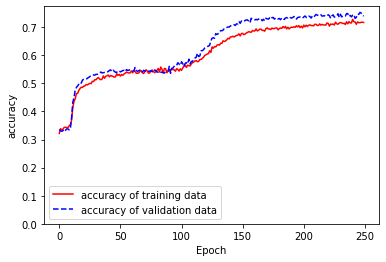

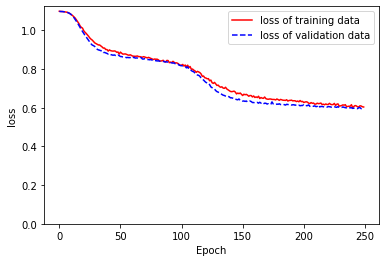

In [76]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.savefig("accuracy vs validation 5.jpg")
    plt.show()
    plt.close()

w0T= [[[-0.08517722  0.01879265  0.2793418  -0.06403209  0.09006578
   -0.25608146  0.01338307 -0.0257125  -0.25194362  0.11621509
    0.21064158]]

 [[-0.15148257  0.49092335 -0.43432742  0.15087858 -0.21692933
    0.1931816  -0.3734605   0.5527359  -0.2148227   0.22647347
   -0.22175181]]

 [[-0.2948284  -0.1057624  -0.05958299  0.04339511  0.11704375
    0.12835655  0.2112795   0.16629353  0.19125976  0.07890265
   -0.39306372]]

 [[ 0.15232183  0.05932001 -0.11568218 -0.07436165 -0.00996646
    0.05722025  0.06264123  0.10023556  0.05479583  0.06768201
    0.16351049]]

 [[ 0.1870958   0.03997707 -0.05950589 -0.00959368  0.07045814
    0.06837661 -0.01768795 -0.17526698 -0.35702324  0.06001246
    0.20656736]]]
w01= [-0.07992409 -0.1283614  -0.37186292 -0.49784142 -0.09087298]
11
5


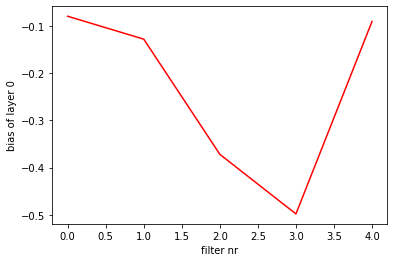

[-0.07992409 -0.1283614  -0.37186292 -0.49784142 -0.09087298]


In [77]:
c = ['k', 'r', 'y', 'b', 'm']
def plt_w(w):
    #Plot weight of convol. layer
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0],c[i],label=str(i))
    plt.ylabel('weight')
    plt.xlabel('index')
    plt.legend()
    plt.show()
    
w0 = model.layers[0].get_weights()[0]    
w01 = model.layers[0].get_weights()[1]   
w0T = w0.T
print('w0T=', w0T)
print('w01=', w01)
print(len(w0))
print(len(w0T))

plt.plot(w01, 'r', label=str(i))
plt.ylabel('bias of layer 0')
plt.xlabel('filter nr')
plt.show()
print(w01)

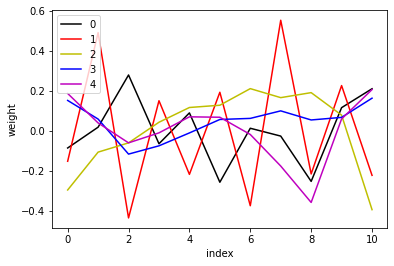

<Figure size 432x288 with 0 Axes>

In [78]:
plt_w(w0T)
plt.savefig("weight l2.jpg")
plt.show()
plt.close()

Try L1

In [79]:
reg = regularizers.l1(0.001)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0,stddev=0.05)

model = Sequential()
model.add(Conv1D(filters=5,kernel_size=11,kernel_regularizer=reg,
                kernel_initializer=ini,
                activation="relu",
                input_shape=input_shape))
model.add(AveragePooling1D(5))
model.add(Flatten())
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="relu"))
model.add(Dense(5,activation="sigmoid"))
model.add(Dense(4,activation="tanh"))
model.add(Dense(N_categ, activation="softmax"))


print(model.summary())

opt = optimizers.SGD(lr=0.01,momentum=0.9, nesterov=True, decay=1e-6)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer="adam", metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_11 (Averag (None, 10, 5)             0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 50)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 408       
_________________________________________________________________
dropout_11 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_44 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_45 (Dense)             (None, 5)               

In [80]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train,
               batch_size=batch_size, epochs=epochs,
               validation_data=(x_val,y_val),
               verbose=2, shuffle=True)

Epoch 1/250
28/28 - 1s - loss: 1.1309 - accuracy: 0.3296 - val_loss: 1.1072 - val_accuracy: 0.3453
Epoch 2/250
28/28 - 0s - loss: 1.1060 - accuracy: 0.3293 - val_loss: 1.1001 - val_accuracy: 0.3453
Epoch 3/250
28/28 - 0s - loss: 1.1006 - accuracy: 0.3356 - val_loss: 1.0997 - val_accuracy: 0.3380
Epoch 4/250
28/28 - 0s - loss: 1.0990 - accuracy: 0.3537 - val_loss: 1.0990 - val_accuracy: 0.3587
Epoch 5/250
28/28 - 0s - loss: 1.0984 - accuracy: 0.3479 - val_loss: 1.0981 - val_accuracy: 0.3467
Epoch 6/250
28/28 - 0s - loss: 1.0975 - accuracy: 0.3726 - val_loss: 1.0964 - val_accuracy: 0.3947
Epoch 7/250
28/28 - 0s - loss: 1.0955 - accuracy: 0.3967 - val_loss: 1.0948 - val_accuracy: 0.3967
Epoch 8/250
28/28 - 0s - loss: 1.0927 - accuracy: 0.4056 - val_loss: 1.0908 - val_accuracy: 0.4063
Epoch 9/250
28/28 - 0s - loss: 1.0885 - accuracy: 0.3994 - val_loss: 1.0858 - val_accuracy: 0.4070
Epoch 10/250
28/28 - 0s - loss: 1.0828 - accuracy: 0.4139 - val_loss: 1.0785 - val_accuracy: 0.4207
Epoch 11/

28/28 - 0s - loss: 0.6692 - accuracy: 0.6933 - val_loss: 0.6369 - val_accuracy: 0.7137
Epoch 84/250
28/28 - 0s - loss: 0.6701 - accuracy: 0.6896 - val_loss: 0.6321 - val_accuracy: 0.7233
Epoch 85/250
28/28 - 0s - loss: 0.6716 - accuracy: 0.6890 - val_loss: 0.6343 - val_accuracy: 0.7127
Epoch 86/250
28/28 - 0s - loss: 0.6781 - accuracy: 0.6903 - val_loss: 0.6456 - val_accuracy: 0.7077
Epoch 87/250
28/28 - 0s - loss: 0.6728 - accuracy: 0.6853 - val_loss: 0.6394 - val_accuracy: 0.7170
Epoch 88/250
28/28 - 0s - loss: 0.6702 - accuracy: 0.6924 - val_loss: 0.6415 - val_accuracy: 0.7117
Epoch 89/250
28/28 - 0s - loss: 0.6689 - accuracy: 0.6933 - val_loss: 0.6316 - val_accuracy: 0.7187
Epoch 90/250
28/28 - 0s - loss: 0.6627 - accuracy: 0.6936 - val_loss: 0.6291 - val_accuracy: 0.7247
Epoch 91/250
28/28 - 0s - loss: 0.6606 - accuracy: 0.6961 - val_loss: 0.6304 - val_accuracy: 0.7137
Epoch 92/250
28/28 - 0s - loss: 0.6620 - accuracy: 0.6979 - val_loss: 0.6302 - val_accuracy: 0.7140
Epoch 93/250


Epoch 165/250
28/28 - 0s - loss: 0.6271 - accuracy: 0.7141 - val_loss: 0.6102 - val_accuracy: 0.7343
Epoch 166/250
28/28 - 0s - loss: 0.6293 - accuracy: 0.7171 - val_loss: 0.6137 - val_accuracy: 0.7260
Epoch 167/250
28/28 - 0s - loss: 0.6316 - accuracy: 0.7140 - val_loss: 0.6109 - val_accuracy: 0.7320
Epoch 168/250
28/28 - 0s - loss: 0.6298 - accuracy: 0.7176 - val_loss: 0.6190 - val_accuracy: 0.7237
Epoch 169/250
28/28 - 0s - loss: 0.6265 - accuracy: 0.7211 - val_loss: 0.6144 - val_accuracy: 0.7277
Epoch 170/250
28/28 - 0s - loss: 0.6238 - accuracy: 0.7181 - val_loss: 0.6108 - val_accuracy: 0.7283
Epoch 171/250
28/28 - 0s - loss: 0.6276 - accuracy: 0.7156 - val_loss: 0.6123 - val_accuracy: 0.7280
Epoch 172/250
28/28 - 0s - loss: 0.6254 - accuracy: 0.7207 - val_loss: 0.6147 - val_accuracy: 0.7260
Epoch 173/250
28/28 - 0s - loss: 0.6249 - accuracy: 0.7187 - val_loss: 0.6103 - val_accuracy: 0.7297
Epoch 174/250
28/28 - 0s - loss: 0.6241 - accuracy: 0.7230 - val_loss: 0.6133 - val_accurac

28/28 - 0s - loss: 0.6087 - accuracy: 0.7331 - val_loss: 0.6010 - val_accuracy: 0.7403
Epoch 247/250
28/28 - 0s - loss: 0.6050 - accuracy: 0.7327 - val_loss: 0.5994 - val_accuracy: 0.7417
Epoch 248/250
28/28 - 0s - loss: 0.6039 - accuracy: 0.7330 - val_loss: 0.6058 - val_accuracy: 0.7343
Epoch 249/250
28/28 - 0s - loss: 0.6070 - accuracy: 0.7301 - val_loss: 0.6013 - val_accuracy: 0.7377
Epoch 250/250
28/28 - 0s - loss: 0.6064 - accuracy: 0.7286 - val_loss: 0.6004 - val_accuracy: 0.7417


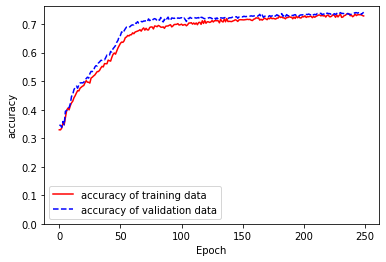

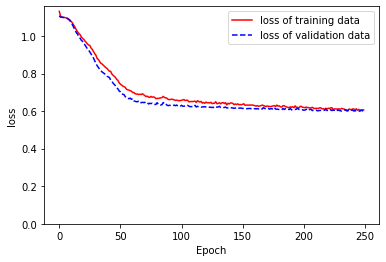

In [81]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+' of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+' of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim(0)
    plt.savefig("accuracy vs validation 5.jpg")
    plt.show()
    plt.close()

w0T= [[[ 1.9438885e-01 -1.7708205e-01  7.4587375e-02 -3.1367000e-02
   -2.4850940e-02  3.9377619e-02  1.0804274e-01  5.3739559e-02
    1.2131451e-01 -4.3914653e-05 -2.4740683e-01]]

 [[ 6.6507198e-02  3.7052233e-02 -1.1642696e-01 -1.8511669e-01
   -1.5646014e-01 -8.8491634e-02  1.5122459e-03  1.6121392e-01
    1.3185091e-01  1.3990091e-01  1.0602732e-01]]

 [[-1.4342302e-01  2.2459278e-01 -1.8419850e-01  1.5422933e-01
   -2.3248877e-01  4.7177583e-01 -3.5207856e-01  1.1965473e-01
   -1.9193494e-01  1.9101769e-01 -4.8715737e-02]]

 [[ 1.4876533e-01  2.0738008e-02 -1.5054354e-01 -2.5518777e-02
   -1.2538886e-01  1.2258786e-01  2.1950450e-02  6.2182035e-02
    8.8652380e-02  1.9347905e-01 -3.6949965e-01]]

 [[-8.2662556e-04  1.5993489e-01  2.0084541e-01  3.3225733e-01
    4.4913176e-02 -3.8502482e-01 -1.8359600e-01 -7.6598465e-02
   -2.8349405e-02 -8.0761230e-03  5.3696189e-02]]]
w01= [-0.11402477 -0.43957242 -0.11251044 -0.10076869 -0.26819357]
11
5


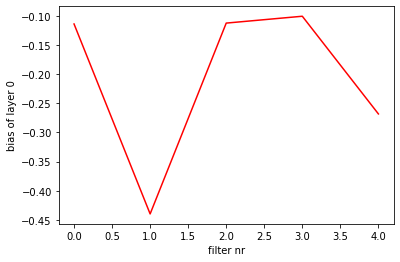

[-0.11402477 -0.43957242 -0.11251044 -0.10076869 -0.26819357]


In [82]:
c = ['k', 'r', 'y', 'b', 'm']
def plt_w(w):
    #Plot weight of convol. layer
    plt.figure(figsize=(6,4))
    for i in range(len(w)):
        plt.plot(w[i][0],c[i],label=str(i))
    plt.ylabel('weight')
    plt.xlabel('index')
    plt.legend()
    plt.show()
    
w0 = model.layers[0].get_weights()[0]    
w01 = model.layers[0].get_weights()[1]   
w0T = w0.T
print('w0T=', w0T)
print('w01=', w01)
print(len(w0))
print(len(w0T))

plt.plot(w01, 'r', label=str(i))
plt.ylabel('bias of layer 0')
plt.xlabel('filter nr')
plt.show()
print(w01)

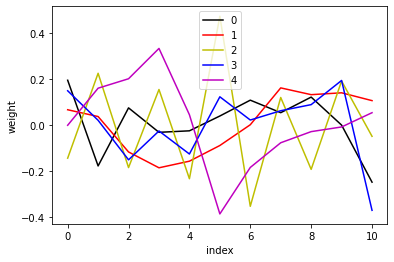

<Figure size 432x288 with 0 Axes>

In [83]:
plt_w(w0T)
plt.savefig("weight l1.jpg")
plt.show()
plt.close()

We can see that the network is improved with the combination of L1 and L2 regualrizations better than the network applied by only L2 (Ridge) regularization. The best regularization shown to be L1 (Lasso) regularization. 

### -----------------------------------------------------------------------------------------------------------------------------

### Convolutional NN with sequence data